### <font color='#556b2f'> ETE-430: Machine Learning for Engineers and Scientists </font>
_**Instructor**: Dr. Nursadul Mamun_ <br>
_**Due**: In class, **Sep 17 (Tuesday)**_

---

# **_Homework 3_**

The report component of this assignment is the **hard copy** of this homework, along with your answers to questions, and is **due at the start of class on <font color='#556b2f'>Tuesday, Sep 17, 2024</font>**.

The **electronic version** of this homework **must be uploaded on eLearning by <font color='#556b2f'>9:59am Central Standard Time, Tuesday, Sep 17, 2024</font>**. All deadlines are hard and without exceptions unless permission was obtained from the instructor **in advance**.

You may work in groups to discuss the problems and work through solutions together. However, you must **write up your solutions on your own**, without copying another student's work or letting another student copy your work. In your solution for each problem, you must write down the names of your partner (if any); this will not affect your grade.

---

# 1. <font color='#556b2f'> **Decision Trees with Synthetic Data**</font>, 25 points.

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the generalization behavior of decision trees of increasing complexity, characterized by their depth, $d$.

In [10]:
#
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION,
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
    # Generate a non-linear data set
    X, y = make_circles(n_samples=n_samples, noise=0.25, random_state=42, factor=0.3)

    # Take a small subset of the data and make it VERY noisy; that is, generate outliers
    m = 30
    np.random.seed(30)  # Deliberately use a different seed
    ind = np.random.permutation(n_samples)[:m]
    X[ind, :] += np.random.multivariate_normal([0, 0], 0.25*np.eye(2), (m, ))
    y[ind] = 1 - y[ind]

    # Plot this data
    cmap = ListedColormap(['#b30065', '#178000'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')

    # First, we use train_test_split to partition (X, y) into training and test sets
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, random_state=42)

    # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
    X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, random_state=42)

    return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

### EXplaination of Upper cell:
1.noise :0.25 this the gaussian noise with standard deviation of 0.25 \
2.factor : 0.3 define the distance between two circle \
3. m: outliner \

In [11]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION,
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
def visualize(models, X, y):
    # Initialize plotting
    if len(models) % 3 == 0:
        nrows = len(models) // 3
    else:
        nrows = len(models) // 3 + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
    cmap = ListedColormap(['#b30065', '#178000'])

    # Create a mesh
    xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
    yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01),
                               np.arange(yMin, yMax, 0.01))

    for i, (p, clf) in enumerate(models.items()):
        r, c = np.divmod(i, 3)
        if nrows == 1:
            ax = axes[c]
        else:
            ax = axes[r, c]

        # Plot contours
        zMesh = clf.predict(np.c_[xMesh.ravel(), yMesh.ravel()])
        zMesh = zMesh.reshape(xMesh.shape)
        ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

        # Plot data
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')
        ax.set_title('Tree Depth = {0}'.format(p))

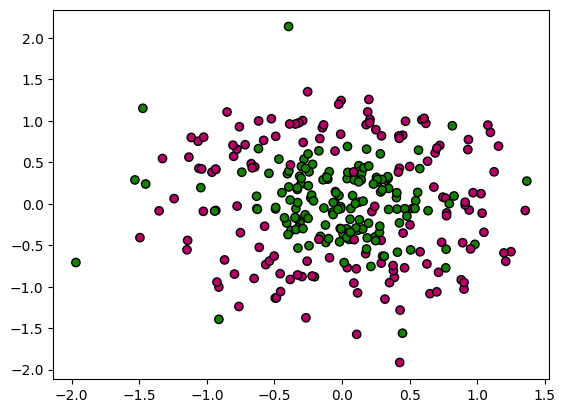

In [12]:
# Generate the data
n_samples = 300    # Total size of data set
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. Model Selection and Visualization (20 points)
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns decision trees. Use scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function to learn decision trees of different depths, $d \in \{1, \, \cdots, \, 9 \}$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly. Visualize the decision trees of different depths using the provided function.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $d_{best}$. Report the accuracy on the **test set** for this selected best decision tree model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $d_{best}$_

Learning a decision tree with depth = 1.
Learning a decision tree with depth = 2.
Learning a decision tree with depth = 3.
Learning a decision tree with depth = 4.
Learning a decision tree with depth = 5.
Learning a decision tree with depth = 6.
Learning a decision tree with depth = 7.
Learning a decision tree with depth = 8.
Learning a decision tree with depth = 9.


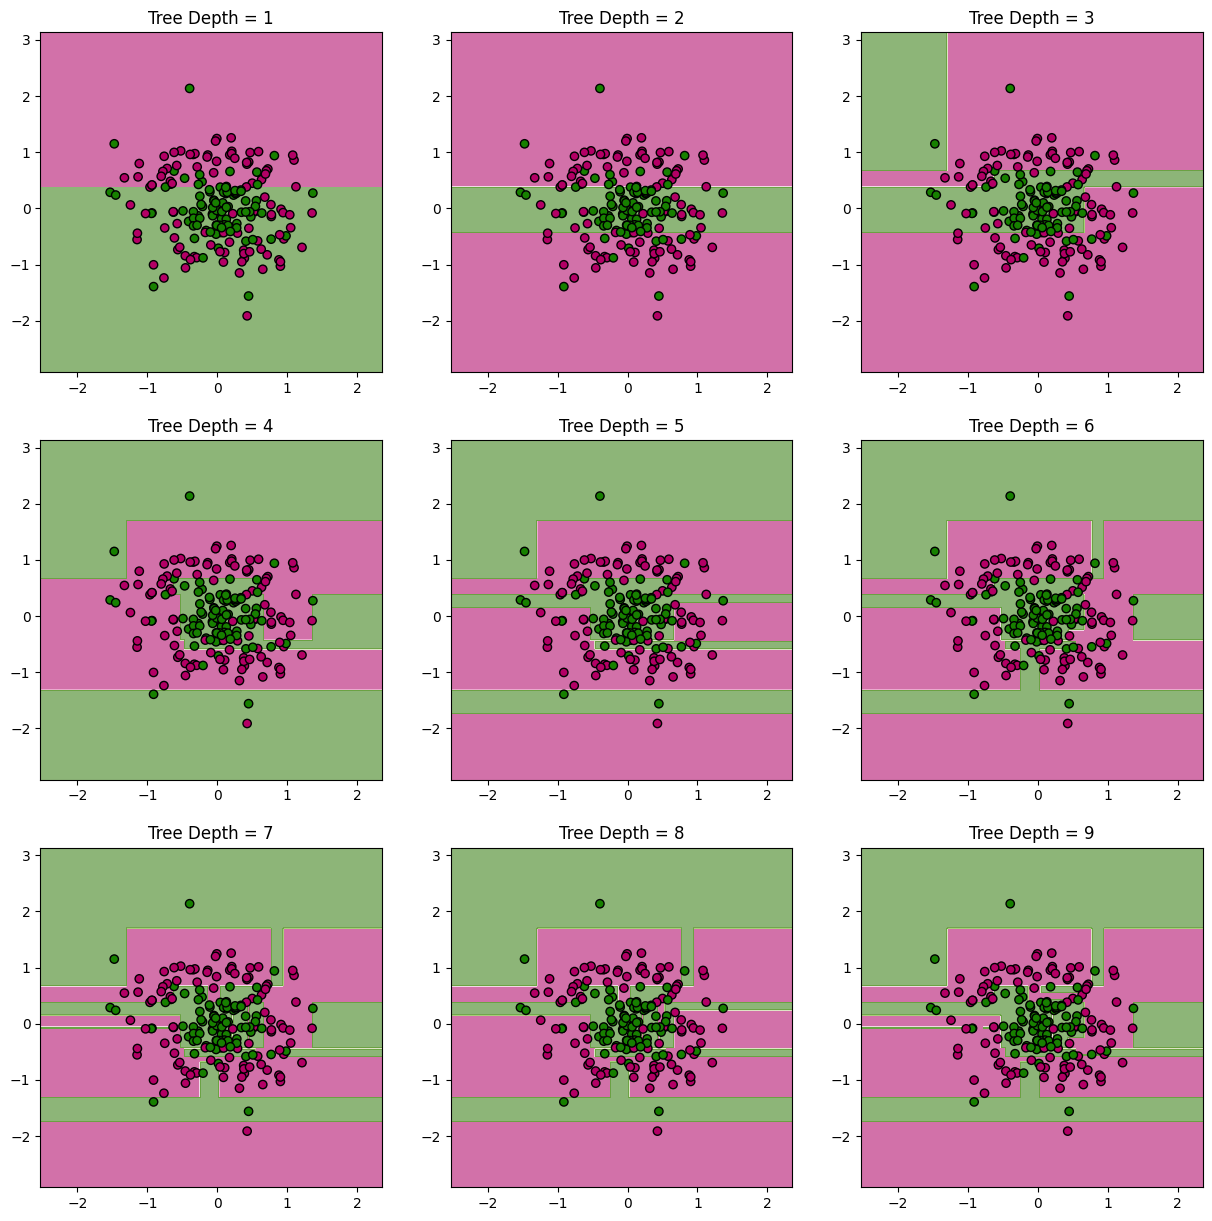

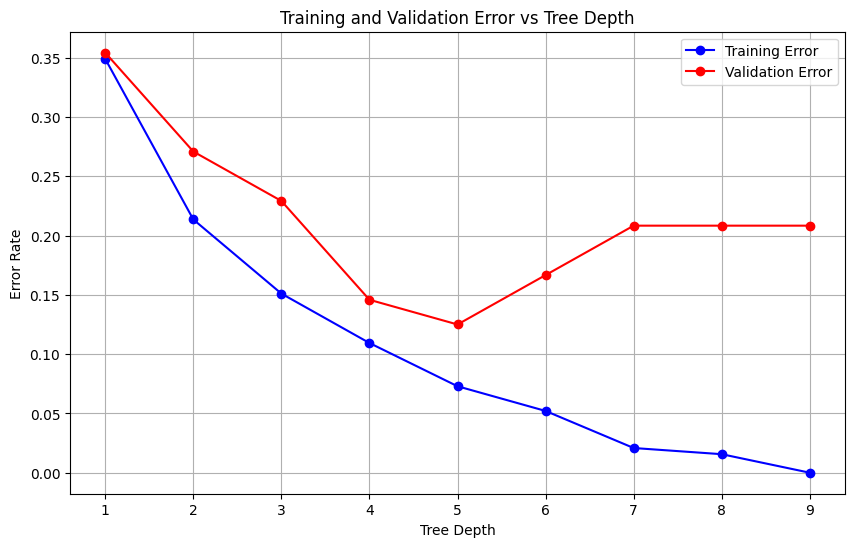

The best depth based on validation error is d_best = 5.
Test set accuracy for the best model (d_best = 5) is 0.8000.


In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision tree depths to evaluate
d_values = np.arange(1, 10, dtype='int')

# Dictionaries to store models, training error, and validation error
models = dict()
trnErr = dict()
valErr = dict()

# Learn decision trees of varying depths
for d in d_values:
    print(f'Learning a decision tree with depth = {d}.')

    # Create and train the DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_trn, y_trn)
    
    # Store the model
    models[d] = clf
    
    # Compute training error
    y_trn_pred = clf.predict(X_trn)
    trnErr[d] = 1 - accuracy_score(y_trn, y_trn_pred)
    
    # Compute validation error
    y_val_pred = clf.predict(X_val)
    valErr[d] = 1 - accuracy_score(y_val, y_val_pred)

# Visualize the decision boundaries for all models
visualize(models, X_trn, y_trn)

# Plot training and validation errors as a function of tree depth
plt.figure(figsize=(10, 6))
plt.plot(d_values, list(trnErr.values()), label='Training Error', marker='o', color='blue')
plt.plot(d_values, list(valErr.values()), label='Validation Error', marker='o', color='red')
plt.xlabel('Tree Depth')
plt.ylabel('Error Rate')
plt.title('Training and Validation Error vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the best depth (d_best) based on validation error
d_best = min(valErr, key=valErr.get)
print(f'The best depth based on validation error is d_best = {d_best}.')

# Compute and report the test set accuracy for the model with the best depth
best_model = models[d_best]
y_tst_pred = best_model.predict(X_tst)
test_accuracy = accuracy_score(y_tst, y_tst_pred)
print(f'Test set accuracy for the best model (d_best = {d_best}) is {test_accuracy:.4f}.')

Learning a decision tree with depth = 1.
Learning a decision tree with depth = 2.
Learning a decision tree with depth = 3.
Learning a decision tree with depth = 4.
Learning a decision tree with depth = 5.
Learning a decision tree with depth = 6.
Learning a decision tree with depth = 7.
Learning a decision tree with depth = 8.
Learning a decision tree with depth = 9.


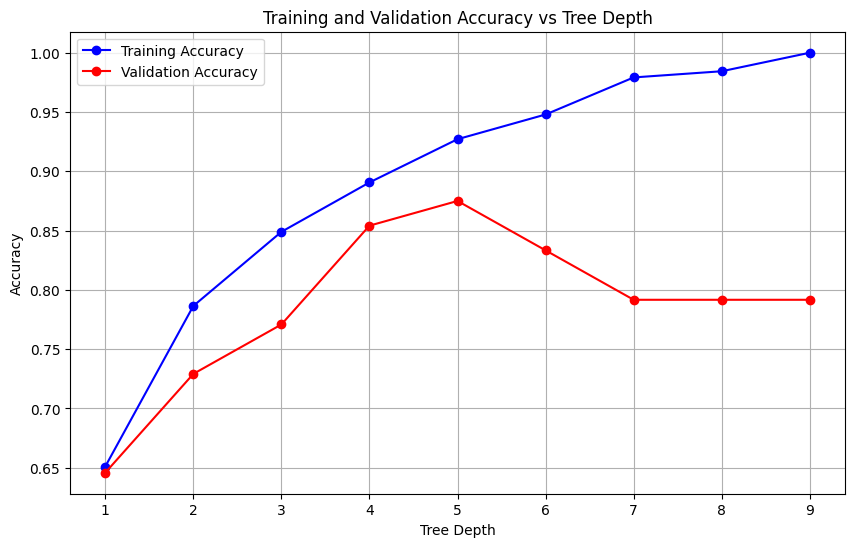

The best depth based on validation accuracy is d_best = 5.
Test set accuracy for the best model (d_best = 5) is 0.8000.


In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision tree depths to evaluate
d_values = np.arange(1, 10, dtype='int')

# Dictionaries to store models, training accuracy, and validation accuracy
models = dict()
trnAcc = dict()
valAcc = dict()

# Learn decision trees of varying depths
for d in d_values:
    print(f'Learning a decision tree with depth = {d}.')

    # Create and train the DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_trn, y_trn)
    
    # Store the model
    models[d] = clf
    
    # Compute training accuracy
    y_trn_pred = clf.predict(X_trn)
    trnAcc[d] = accuracy_score(y_trn, y_trn_pred)
    
    # Compute validation accuracy
    y_val_pred = clf.predict(X_val)
    valAcc[d] = accuracy_score(y_val, y_val_pred)

# Plot training and validation accuracies as a function of tree depth
plt.figure(figsize=(10, 6))
plt.plot(d_values, list(trnAcc.values()), label='Training Accuracy', marker='o', color='blue')
plt.plot(d_values, list(valAcc.values()), label='Validation Accuracy', marker='o', color='red')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

# Find the best depth (d_best) based on validation accuracy
d_best = max(valAcc, key=valAcc.get)
print(f'The best depth based on validation accuracy is d_best = {d_best}.')

# Compute and report the test set accuracy for the model with the best depth
best_model = models[d_best]
y_tst_pred = best_model.predict(X_tst)
test_accuracy = accuracy_score(y_tst, y_tst_pred)
print(f'Test set accuracy for the best model (d_best = {d_best}) is {test_accuracy:.4f}.')

---
### **b**. Discussion (5 points)
How do the training error and the validation error change with $d$? Based on the visualization of the models and their resulting classifiers, how does changing $d$ change the models? Explain in terms of complexity and fit.

## depth observe classifier
### As the tree depth increases, the decision tree model becomes more complex and better able to fit the training data. This causes the training error to decrease because a deeper tree can capture more nuances and patterns in the data.
### Overfitting happens when the model learns not just the underlying pattern but also noise or small variations in the training data that do not generalize to the validation set
### Small 𝑑:High training and validation errors → Underfitting.
### Optimald: Low training and validation errors → Best generalization (selected model).
### Large d: Low training error but increasing validation error → Overfitting.
### When validation error and test error decreases but after the certain value of d the validation error increases. from where the validation error increases that value of d is the optimal value

---
# 2. <font color='#556b2f'> **Evaluating Moves for Tic-Tac-Toe with Decision Trees**</font>, 35 points.

For this problem, we will use the [Tic-Tac-Toe](https://www.google.com/search?q=tic+tac+toe) [Endgame](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) data set, which has already been pre-processed and partitioned into training and test sets. The data set contains the complete set of possible board configurations at the end of tic-tac-toe games, where "x" is assumed to have played first. The target concept is "win for x" (i.e., true when "x" has one of 8 possible ways to create a "three-in-a-row"). Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

The first column in the train and test files is the label ($1=$ win for x and $0=$ loss for x). The next 9 columns are the features ($0=$ blank, $1=$'o', $2=$'x') describing the game board state, **row-wise**.

In [23]:
# Load the data set; download the files from Google Classroom
# CSV files can be read easily using np.loadtxt()

# Load the training data
M = np.loadtxt('tictactoe_trn.csv', delimiter=',', dtype=int)
y_trn = M[:, 0]
X_trn = M[:, 1:]

# Load the test data
M = np.loadtxt('tictactoe_tst.csv', delimiter=',', dtype=int)
y_tst = M[:, 0]
X_tst = M[:, 1:]

# Load feature names
feature_names = np.loadtxt('tictactoe_names.csv', delimiter=',', dtype='str')
print(feature_names)

['top-left' 'top-mid' 'top-right' 'mid-left' 'mid-mid' 'mid-right'
 'bot-left' 'bot-mid' 'bot-right']


---
### **a**. Model Selection (25 points)
**Cross validation**: Here, instead of a single validation set, we will use a $10$-fold cross validation procedure to improve robustness of model selection. Use scikit-learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) function to perform model selection with decision trees of different depths, $d = 3, \, \cdots, \, 15 \}$ via $10$-fold cross validation. **Make sure you are using entropy as the split criterion**.

**Final Model Selection**: Select the best classifier corresponding to the smallest cross-validation error, learn a final model and report the **test set** accuracy.

In [24]:
from sklearn.model_selection import cross_val_score

d_values = np.arange(3, 16, dtype='int')
trnErr = dict()
cvErr = dict()

# Perform 10-fold cross validation for each choice of d and save the average cross-validation error
for d in d_values:
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=42)
    cv_scores = cross_val_score(clf, X_trn, y_trn, cv=10, scoring='accuracy')
    cvErr[d] = 1 - np.mean(cv_scores)
    print('Learning a decision tree with d = {0}.'.format(d))


# Select the best depth based on the smallest cross-validation error
d_best = min(cvErr, key=cvErr.get)
print(f'The best depth based on cross-validation is d_best = {d_best}.')

# Train the final model using the entire training set with the best depth
final_model = DecisionTreeClassifier(max_depth=d_best, criterion='entropy', random_state=42)
final_model.fit(X_trn, y_trn)

# Compute and report the test set accuracy
y_tst_pred = final_model.predict(X_tst)
test_accuracy = accuracy_score(y_tst, y_tst_pred)
print(f'Test set accuracy for the best model (d_best = {d_best}) is {test_accuracy:.4f}.')

Learning a decision tree with d = 3.
Learning a decision tree with d = 4.
Learning a decision tree with d = 5.
Learning a decision tree with d = 6.
Learning a decision tree with d = 7.
Learning a decision tree with d = 8.
Learning a decision tree with d = 9.
Learning a decision tree with d = 10.
Learning a decision tree with d = 11.
Learning a decision tree with d = 12.
Learning a decision tree with d = 13.
Learning a decision tree with d = 14.
Learning a decision tree with d = 15.
The best depth based on cross-validation is d_best = 10.
Test set accuracy for the best model (d_best = 10) is 0.8625.


Learning a decision tree with d = 3.
Learning a decision tree with d = 4.
Learning a decision tree with d = 5.
Learning a decision tree with d = 6.
Learning a decision tree with d = 7.
Learning a decision tree with d = 8.
Learning a decision tree with d = 9.
Learning a decision tree with d = 10.
Learning a decision tree with d = 11.
Learning a decision tree with d = 12.
Learning a decision tree with d = 13.
Learning a decision tree with d = 14.
Learning a decision tree with d = 15.


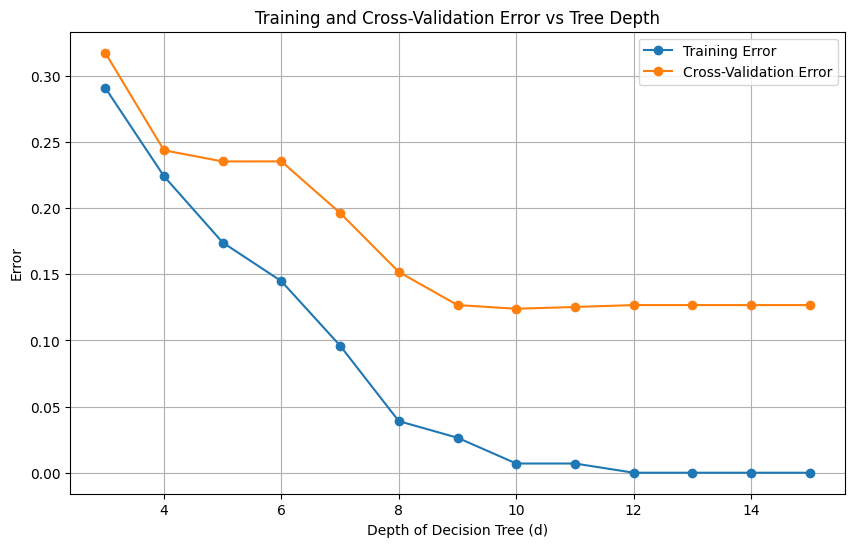

Best depth selected based on cross-validation error: d = 10
Final test accuracy for the best model (d = 10): 0.8750


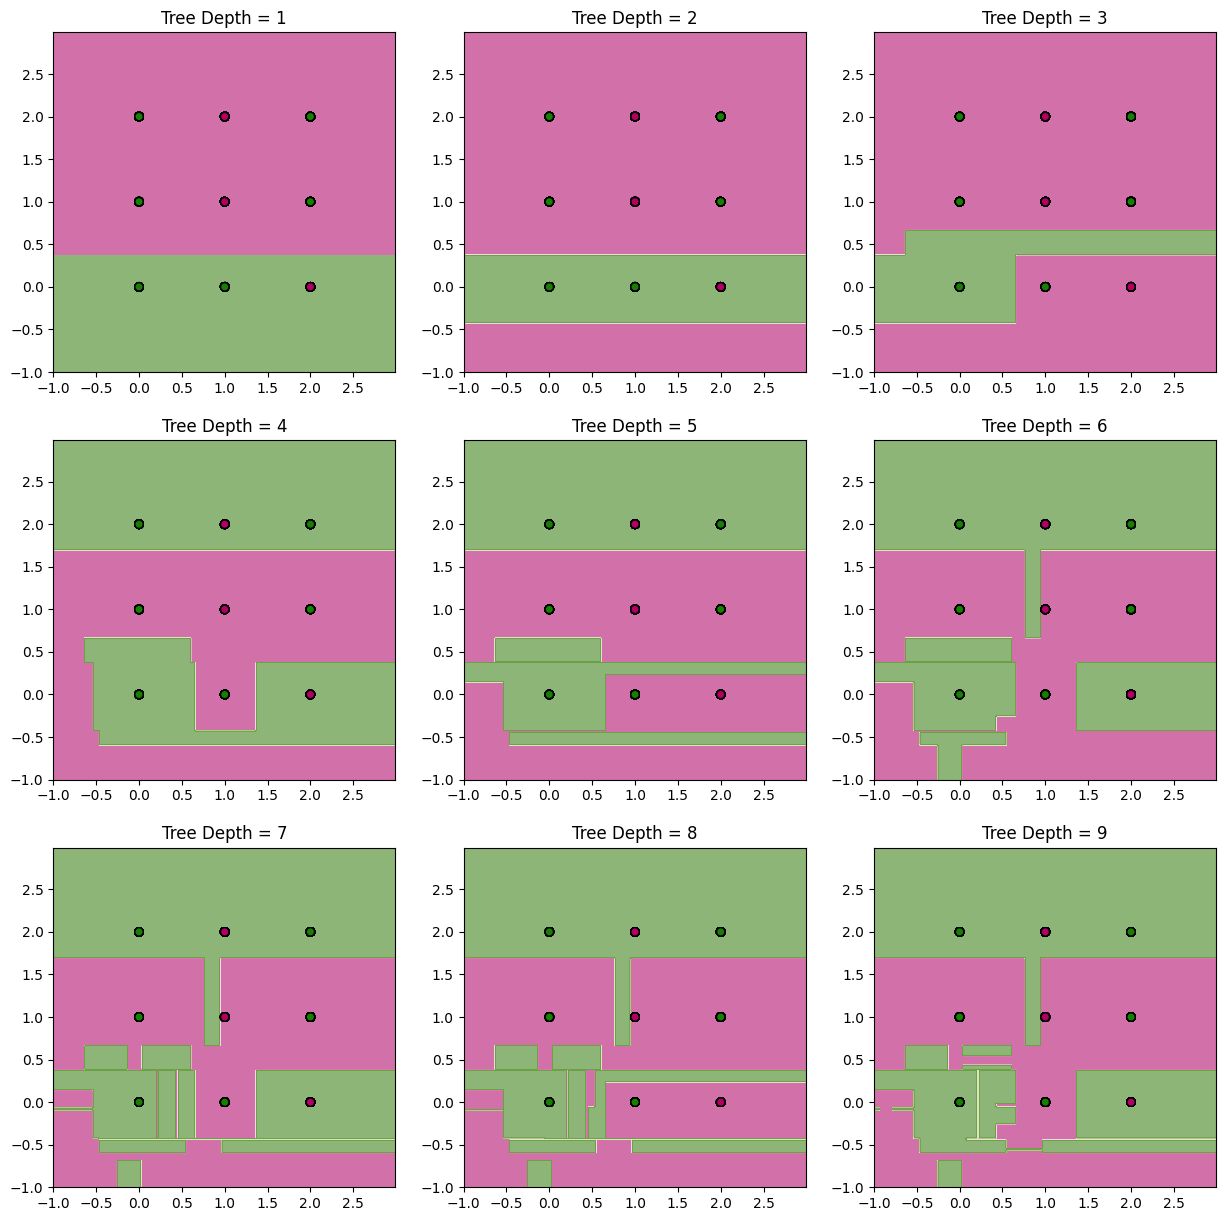

In [25]:
d_values = np.arange(3, 16, dtype='int')
trnErr = dict()
cvErr = dict()

# Perform 10-fold cross validation for each choice of d and save the average cross-validation error
for d in d_values:
    model = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=42)
    cv_scores = cross_val_score(model, X_trn, y_trn, cv=10)
    cvErr[d] = 1 - np.mean(cv_scores)  # Cross-validation error
    model.fit(X_trn, y_trn)
    y_trn_pred = model.predict(X_trn)
    trnErr[d] = 1 - accuracy_score(y_trn, y_trn_pred)  # Training error
    print('Learning a decision tree with d = {0}.'.format(d))
# Plot the training and cross-validation error curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(d_values, [trnErr[d] for d in d_values], label='Training Error', marker='o')
plt.plot(d_values, [cvErr[d] for d in d_values], label='Cross-Validation Error', marker='o')
plt.xlabel('Depth of Decision Tree (d)')
plt.ylabel('Error')
plt.title('Training and Cross-Validation Error vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

visualize(models, X_trn, y_trn)

# Select the best model based on the smallest cross-validation error
dbest = min(cvErr, key=cvErr.get)
print(f'Best depth selected based on cross-validation error: d = {dbest}')

# Train the final model using the best depth on the entire training set
final_model = DecisionTreeClassifier(max_depth=dbest, criterion='entropy', random_state=0)
final_model.fit(X_trn, y_trn)

# Evaluate the final model on the test set
y_test_pred = final_model.predict(X_tst)
test_accuracy = accuracy_score(y_tst, y_test_pred)

print(f'Final test accuracy for the best model (d = {dbest}): {test_accuracy:.4f}')

---
### **b**. Model Visualization (5 points)
We can use [GraphViz](https://www.graphviz.org/) to visualize a decision trees. Train a decision tree corresponding to $d = 5$ and then visualize it using the code below.

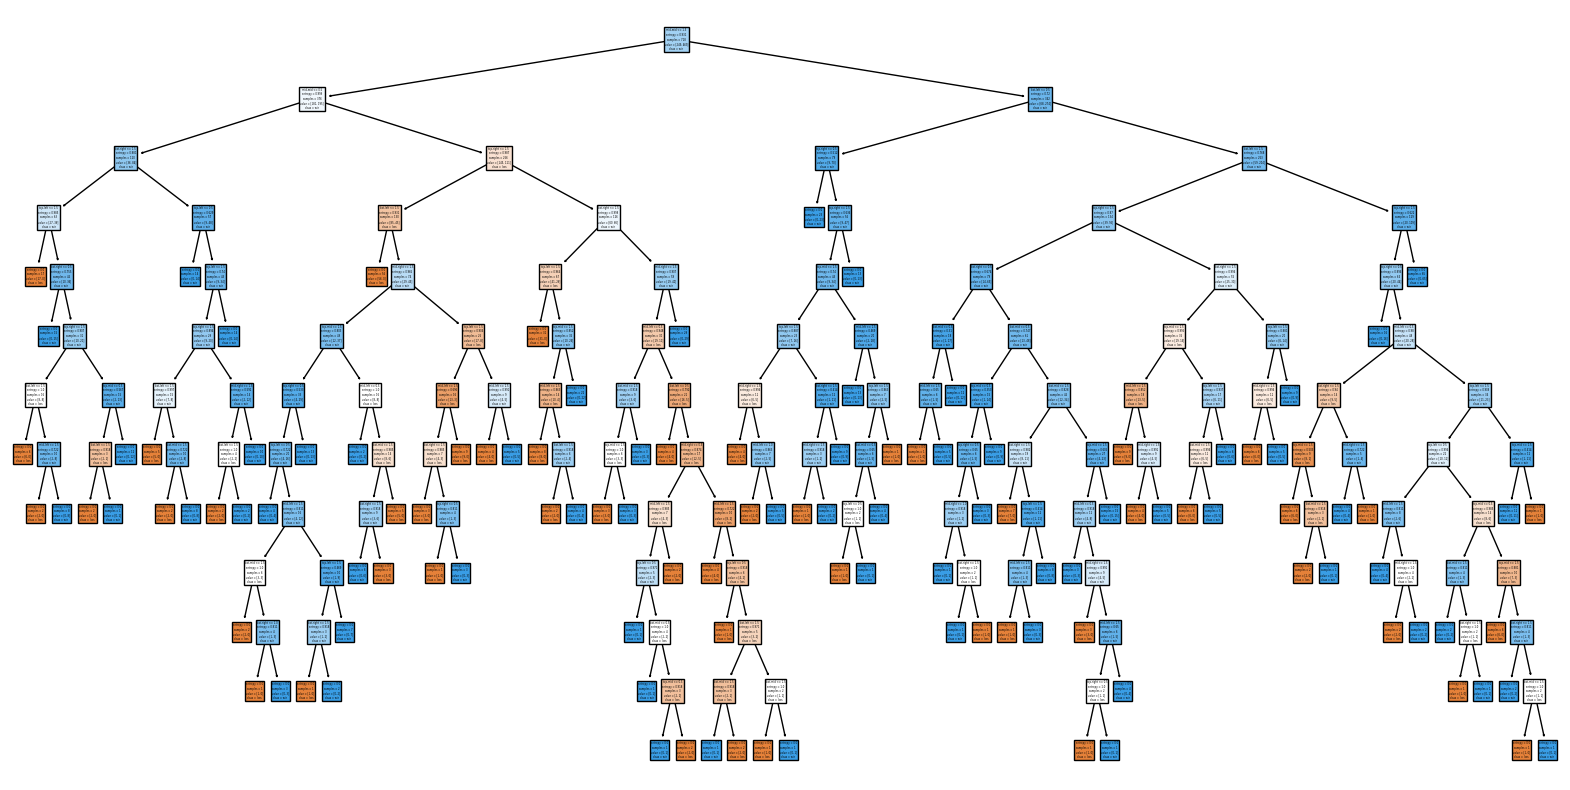

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=['loss', 'win'], filled=True)
plt.show()

---
### **c**. Discussion (5 points)
Identify a **leaf node** in the tree that corresponds to a win (for 'x') with high confidence (that is, low entropy) and with a high number of samples. Draw the board game state (a 3 x 3 grid) that corresponds to this leaf node by analyzing all the conditions from the root of the tree to your chosen leaf node. Note that the features have been pre-processed as follows 0=blank, 1='o' and 2='x'. We also assume that 'x' goes first in all games.